In [27]:
# Инструменты для изучения данных
import pandas as pd
import numpy as np
from collections import Counter
import statistics

import warnings
warnings.simplefilter("ignore")

# Графики
import seaborn as sns
import matplotlib.pyplot as plt

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
# from pytorch_tabnet.tab_model import TabNetClassifier
from catboost import CatBoostClassifier

# Инструменты для обработки данных
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, KFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer
from sklearn.preprocessing import LabelEncoder

# Скоринг
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, make_scorer

In [8]:
kish_data = pd.read_csv('data/e-coli-data.csv')
moloch_data = pd.read_csv('data/molochka.csv')

In [9]:
kish_data.drop(columns=['Compound'], inplace=True)
kish_data['Name'] = 1

moloch_data.drop(columns=['Compound'], inplace=True)
moloch_data['Name'] = 0

# 0 - Молочка, 1 - Кишечка

In [10]:
kish_data.sample(3)

,0.02 V,0.1 V,0.5 V,1 V,5 V,Name
39800,-0.000003,0.000002,3.400000e-05,1.710000e-04,0.01071,1
6984,0.000006,0.000009,2.633730e-05,6.801090e-05,0.00112,1
4632,-0.000002,-0.000002,-2.245230e-07,3.813760e-07,0.00024,1


In [11]:
moloch_data.rename(columns={'1.0 V':'1 V', '5.0 V': '5 V'}, inplace=True)
data = pd.concat([kish_data, moloch_data], ignore_index=True)

<Axes: xlabel='Name', ylabel='Count'>

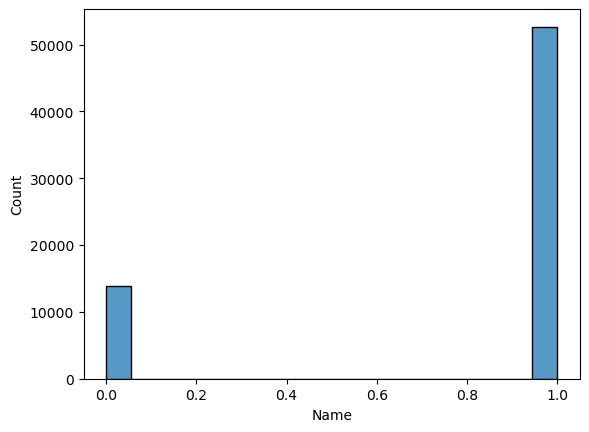

In [12]:
sns.histplot(data["Name"])

In [13]:
X = data.drop(columns=["Name"])
y = data["Name"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

under_sampler = RandomUnderSampler(random_state=1)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)
print("Class distribution after undersampling:", Counter(y_train))

Class distribution after undersampling: Counter({0: 11157, 1: 11157})


<Axes: xlabel='Name', ylabel='Count'>

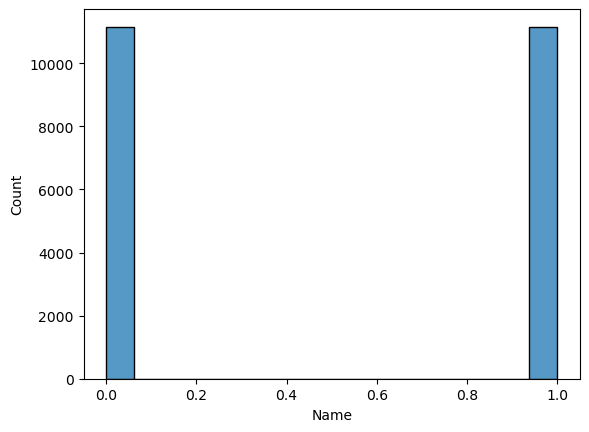

In [14]:
sns.histplot(y_train)

In [15]:
# MinMaxScaled Data

mms = MinMaxScaler()

mms.fit(X_train)
X_mms_train = mms.transform(X_train)
X_mms_test = mms.transform(X_test)

In [16]:
# RobustScaled Data

rs = RobustScaler()

rs.fit(X_train)
X_rs_train = rs.transform(X_train)
X_rs_test = rs.transform(X_test)

In [17]:
# Normalized Data

ner = Normalizer()

ner.fit(X_train) 
X_ner_train = ner.transform(X_train)
X_ner_test = ner.transform(X_test)

In [18]:
def train_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('#', model, '\n',
         '\b_________________________',
         '\nAccuracy_score:', accuracy_score(y_test, y_pred),
         '\nRecall:', recall_score(y_test, y_pred, average='macro'),
         '\nPrecision:', precision_score(y_test, y_pred, average='macro'),
         '\nF1-score:', f1_score(y_test, y_pred, average='macro'), '\n')

In [19]:
model_list = [RandomForestClassifier(), ExtraTreesClassifier(), SVC(), LogisticRegression()]

In [20]:
for mod in model_list:
    train_model(mod, X_train, y_train, X_test, y_test)

# RandomForestClassifier() 
_________________________ 
Accuracy_score: 0.9691510920963747 
Recall: 0.9773284923725587 
Precision: 0.937411214511232 
F1-score: 0.955474034958834 

# ExtraTreesClassifier() 
_________________________ 
Accuracy_score: 0.9913683104405915 
Recall: 0.9941463652959766 
Precision: 0.980525787175671 
F1-score: 0.98714247429483 

# SVC() 
_________________________ 
Accuracy_score: 0.5029647977182317 
Recall: 0.5860136226924122 
Precision: 0.5589627427115071 
F1-score: 0.4826992030891377 

# LogisticRegression() 
_________________________ 
Accuracy_score: 0.5196277114763942 
Recall: 0.4907828247578101 
Precision: 0.49385112752609295 
F1-score: 0.4589093966162546 



In [21]:
for mod in model_list:
    train_model(mod, X_mms_train, y_train, X_mms_test, y_test)

# RandomForestClassifier() 
_________________________ 
Accuracy_score: 0.9833370862418375 
Recall: 0.9872217463275724 
Precision: 0.9647363015460302 
F1-score: 0.9754269571042626 

# ExtraTreesClassifier() 
_________________________ 
Accuracy_score: 0.9914433686106733 
Recall: 0.9940619469568883 
Precision: 0.9808033894641377 
F1-score: 0.9872493742478432 

# SVC() 
_________________________ 
Accuracy_score: 0.697890865420701 
Recall: 0.7977603690370079 
Precision: 0.6970849622447113 
F1-score: 0.6697041320001493 

# LogisticRegression() 
_________________________ 
Accuracy_score: 0.5808001200930721 
Recall: 0.5896003211267491 
Precision: 0.5596311478845797 
F1-score: 0.5303661964996762 



In [22]:
for mod in model_list:
    train_model(mod, X_rs_train, y_train, X_rs_test, y_test)

# RandomForestClassifier() 
_________________________ 
Accuracy_score: 0.9835622607520829 
Recall: 0.987891645597547 
Precision: 0.9648193311718107 
F1-score: 0.9757742343031846 

# ExtraTreesClassifier() 
_________________________ 
Accuracy_score: 0.9916685431209187 
Recall: 0.9942043294912973 
Precision: 0.9813025748408961 
F1-score: 0.9875801359271308 

# SVC() 
_________________________ 
Accuracy_score: 0.7321924491480898 
Recall: 0.8185268208247565 
Precision: 0.7119730364157382 
F1-score: 0.7000221119206474 

# LogisticRegression() 
_________________________ 
Accuracy_score: 0.6015161750356526 
Recall: 0.6041501853151925 
Precision: 0.5698122497621999 
F1-score: 0.5470495321438337 



In [23]:
for mod in model_list:
    train_model(mod, X_ner_train, y_train, X_ner_test, y_test)

# RandomForestClassifier() 
_________________________ 
Accuracy_score: 0.9491105606845305 
Recall: 0.9518641659726852 
Precision: 0.9076259331624363 
F1-score: 0.9271835799178032 

# ExtraTreesClassifier() 
_________________________ 
Accuracy_score: 0.9501613750656759 
Recall: 0.9538474096388414 
Precision: 0.9088974242332684 
F1-score: 0.9287375414961244 

# SVC() 
_________________________ 
Accuracy_score: 0.25482248742775654 
Recall: 0.5247204780948114 
Precision: 0.5857689764345417 
F1-score: 0.235482997935729 

# LogisticRegression() 
_________________________ 
Accuracy_score: 0.5707423253021091 
Recall: 0.5749321793379859 
Precision: 0.549860319837125 
F1-score: 0.5193100896715361 



In [24]:
scaler = MinMaxScaler()

rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()

X_scaled = scaler.fit_transform(X)


print(cross_val_score(rfc, X_scaled, y, cv=StratifiedKFold(shuffle=True)))
print(cross_val_score(etc, X_scaled, y, cv=StratifiedKFold(shuffle=True)))      

[0.99437064 0.99459581 0.99594686 0.99557124 0.99534604]
[0.99834872 0.99827366 0.9976732  0.9983486  0.9981234 ]


___

# TabNet

In [15]:
clf= TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       scheduler_params={"step_size":10, 
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                      )

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [16]:
clf.fit(
    X_rs_train, y_train.values,
    eval_set=[(X_rs_train, y_train.values), (X_rs_test, y_test.values)],
    eval_name=['train', 'test'],
    eval_metric=['balanced_accuracy'],
    max_epochs=500, patience=250,
    batch_size=512, virtual_batch_size=512,
    num_workers=0,
    weights=1,
    drop_last=False
)       

epoch 0  | loss: 0.48989 | train_balanced_accuracy: 0.62916 | test_balanced_accuracy: 0.63265 |  0:00:03s
epoch 1  | loss: 0.42651 | train_balanced_accuracy: 0.74227 | test_balanced_accuracy: 0.74263 |  0:00:05s
epoch 2  | loss: 0.3971  | train_balanced_accuracy: 0.76082 | test_balanced_accuracy: 0.76142 |  0:00:07s
epoch 3  | loss: 0.36372 | train_balanced_accuracy: 0.82894 | test_balanced_accuracy: 0.81876 |  0:00:09s
epoch 4  | loss: 0.37628 | train_balanced_accuracy: 0.79748 | test_balanced_accuracy: 0.7952  |  0:00:11s
epoch 5  | loss: 0.35515 | train_balanced_accuracy: 0.79031 | test_balanced_accuracy: 0.78253 |  0:00:13s
epoch 6  | loss: 0.32458 | train_balanced_accuracy: 0.85951 | test_balanced_accuracy: 0.85307 |  0:00:15s
epoch 7  | loss: 0.29691 | train_balanced_accuracy: 0.80304 | test_balanced_accuracy: 0.79903 |  0:00:17s
epoch 8  | loss: 0.29294 | train_balanced_accuracy: 0.84812 | test_balanced_accuracy: 0.84249 |  0:00:19s
epoch 9  | loss: 0.28558 | train_balanced_accu

/opt/conda/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


___

# Catboost

In [24]:
clf =  CatBoostClassifier(task_type='GPU',
                          bootstrap_type='Poisson',
                          eval_metric='Accuracy',
                          loss_function='MultiClass',
                          depth=8,
                          od_wait=50,
                          l2_leaf_reg=1,
                          iterations=5000,
                          learning_rate=0.1,
                          verbose=250)

cross_val_score(clf, X, y, cv=StratifiedKFold(shuffle=True))

0:	learn: 0.8476450	total: 22.4s	remaining: 1d 7h 7m 19s
250:	learn: 0.9776694	total: 24.4s	remaining: 7m 41s
500:	learn: 0.9927378	total: 26.3s	remaining: 3m 56s
750:	learn: 0.9974104	total: 28.3s	remaining: 2m 40s
1000:	learn: 0.9991556	total: 30.2s	remaining: 2m
1250:	learn: 0.9996435	total: 32.2s	remaining: 1m 36s
1500:	learn: 0.9998499	total: 34.2s	remaining: 1m 19s
1750:	learn: 0.9999625	total: 36.4s	remaining: 1m 7s
2000:	learn: 1.0000000	total: 38.4s	remaining: 57.5s
2250:	learn: 1.0000000	total: 40.3s	remaining: 49.2s
2500:	learn: 1.0000000	total: 42.2s	remaining: 42.2s
2750:	learn: 1.0000000	total: 44.2s	remaining: 36.1s
3000:	learn: 1.0000000	total: 46.1s	remaining: 30.7s
3250:	learn: 1.0000000	total: 48.1s	remaining: 25.9s
3500:	learn: 1.0000000	total: 50s	remaining: 21.4s
3750:	learn: 1.0000000	total: 52s	remaining: 17.3s
4000:	learn: 1.0000000	total: 54s	remaining: 13.5s
4250:	learn: 1.0000000	total: 56s	remaining: 9.87s
4500:	learn: 1.0000000	total: 57.9s	remaining: 6.42

array([0.99752308, 0.99842378, 0.9976732 , 0.99782315, 0.99737277])

In [25]:
model = ExtraTreesClassifier()

values = cross_val_score(model, X_scaled, y, cv=KFold(shuffle=True))

print(values)
print(statistics.mean(values))

[0.99812355 0.99804849 0.99804849 0.99819847 0.9981234 ]
0.9981084788992508


In [26]:
model = RandomForestClassifier()

values = cross_val_score(model, X_scaled, y, cv=KFold(shuffle=True))

print(values)
print(statistics.mean(values))

[0.99534639 0.9949711  0.99459581 0.99557124 0.99557124]
0.9952111557827982


In [28]:
values = [0.9952111557827982, 0.9981084788992508, 0.9984237887342]

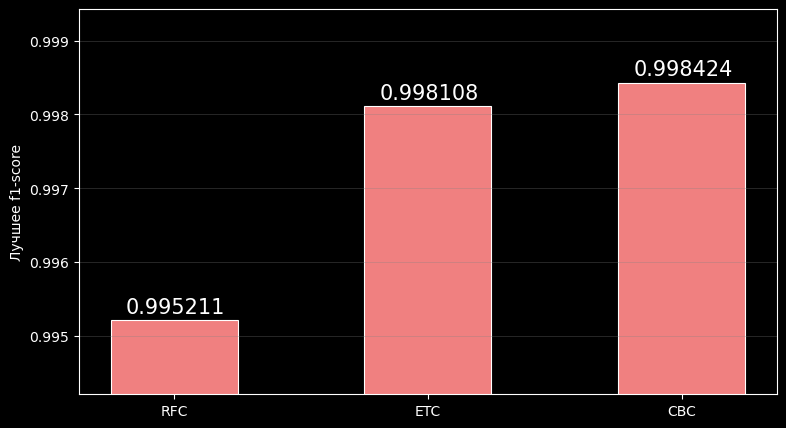

In [44]:
plt.style.use(['dark_background'])
plt.figure(figsize=(9, 5))

plt.bar(range(len(values)), values, color='lightcoral', width=0.5, edgecolor='white', linewidth=0.8)

for i, v in enumerate(values):
    plt.text(i-0.19, v+0.0001, str(round(v, 6)), fontsize=15)

plt.ylabel('Лучшее f1-score')
plt.ylim(min(values)-0.001, max(values)+0.001)
plt.xticks([i for i in range(len(values))], ['RFC', 'ETC', 'CBC'])
plt.grid(color='grey', linewidth=0.7, axis='y', alpha=0.3)

plt.show()